# Exploratory Analysis of NN

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Reading the CSV file produced from the network. 

Note: This the file should contain two the training & validation scores for each of the models (i.e. regular and slow).

In [2]:
df = pd.read_csv("accuracy_metrics")

In [3]:
df

,Unnamed: 0,0,1,2,3,4,5,6,7
0,0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,1,1.0,80.181602,81.087471,0.785272,1.0,53.328068,53.096928,0.779549
2,2,2.0,91.125145,91.867615,0.792198,2.0,61.444927,62.269505,0.771707
3,3,3.0,94.670349,95.271866,0.774674,3.0,76.083694,78.156029,0.799349
4,4,4.0,97.275955,97.825058,0.789295,4.0,87.272011,88.605202,0.775684
...,...,...,...,...,...,...,...,...,...
2996,2996,2996.0,99.810501,99.905434,0.835758,2996.0,99.857880,99.952721,0.919539
2997,2997,2997.0,99.810501,99.905434,0.840615,2997.0,99.857880,99.952721,0.908751
2998,2998,2998.0,99.810501,99.905434,0.851704,2998.0,99.857880,99.952721,0.900886
2999,2999,2999.0,99.810501,99.905434,0.855839,2999.0,99.857880,99.952721,0.924821


Cleaning the dataframe for readability and graphability.

In [4]:
df = df.drop(['Unnamed: 0', '0', '4'], axis=1).drop([0])

In [5]:
df = df.rename({'1':"Slow Training",'2': "Slow Validation", '3': "Slow K.A.", 
                '5':"Reg. Train", '6':"Reg. Validation", '7': "Reg K.A."}, axis=1)

In [6]:
df

,Slow Training,Slow Validation,Slow K.A.,Reg. Train,Reg. Validation,Reg K.A.
1,80.181602,81.087471,0.785272,53.328068,53.096928,0.779549
2,91.125145,91.867615,0.792198,61.444927,62.269505,0.771707
3,94.670349,95.271866,0.774674,76.083694,78.156029,0.799349
4,97.275955,97.825058,0.789295,87.272011,88.605202,0.775684
5,97.773392,98.250587,0.782683,95.665222,96.501183,0.793790
...,...,...,...,...,...,...
2996,99.810501,99.905434,0.835758,99.857880,99.952721,0.919539
2997,99.810501,99.905434,0.840615,99.857880,99.952721,0.908751
2998,99.810501,99.905434,0.851704,99.857880,99.952721,0.900886
2999,99.810501,99.905434,0.855839,99.857880,99.952721,0.924821


Graphing the plot

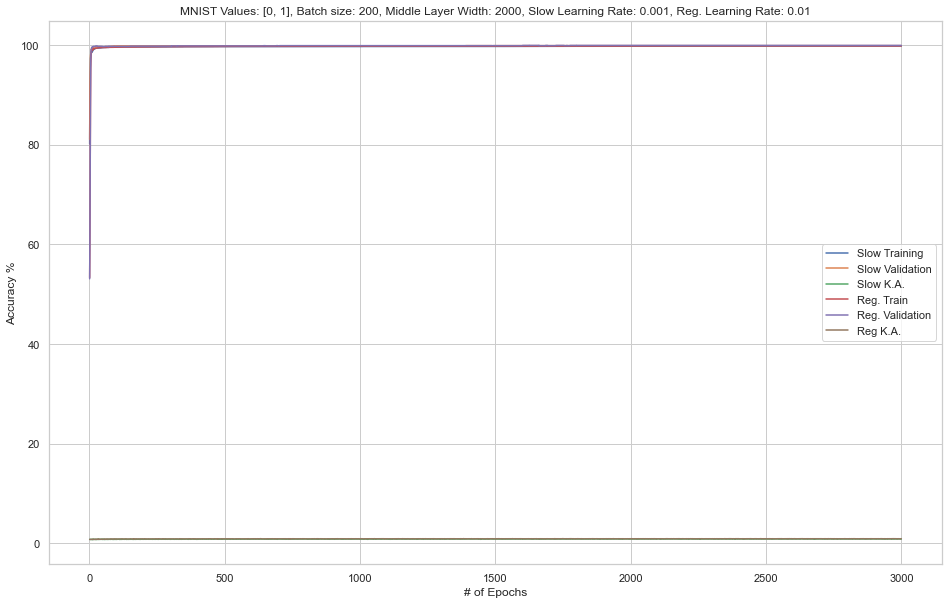

In [9]:
sns.set(rc = {'figure.figsize':(16,10)}) # setting figure size
sns.set_style('whitegrid') # setting seaborn theme 
plot = sns.lineplot(data=df, dashes=False);
plot.set_title("MNIST Values: [0, 1], Batch size: 200, Middle Layer Width: 2000, Slow Learning Rate: 0.001, Reg. Learning Rate: 0.01")
plt.xlabel("# of Epochs");
plt.ylabel("Accuracy %");

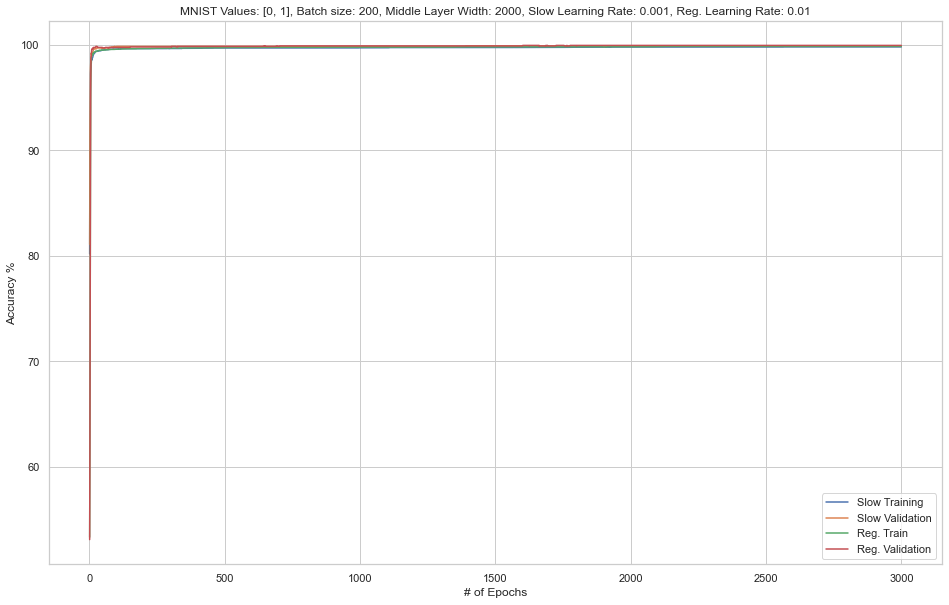

In [10]:
sns.set(rc = {'figure.figsize':(16,10)}) # setting figure size
sns.set_style('whitegrid') # setting seaborn theme 
plot = sns.lineplot(data=df[["Slow Training", "Slow Validation", "Reg. Train", "Reg. Validation"]], dashes=False);
plot.set_title("MNIST Values: [0, 1], Batch size: 200, Middle Layer Width: 2000, Slow Learning Rate: 0.001, Reg. Learning Rate: 0.01")
plt.xlabel("# of Epochs");
plt.ylabel("Accuracy %");

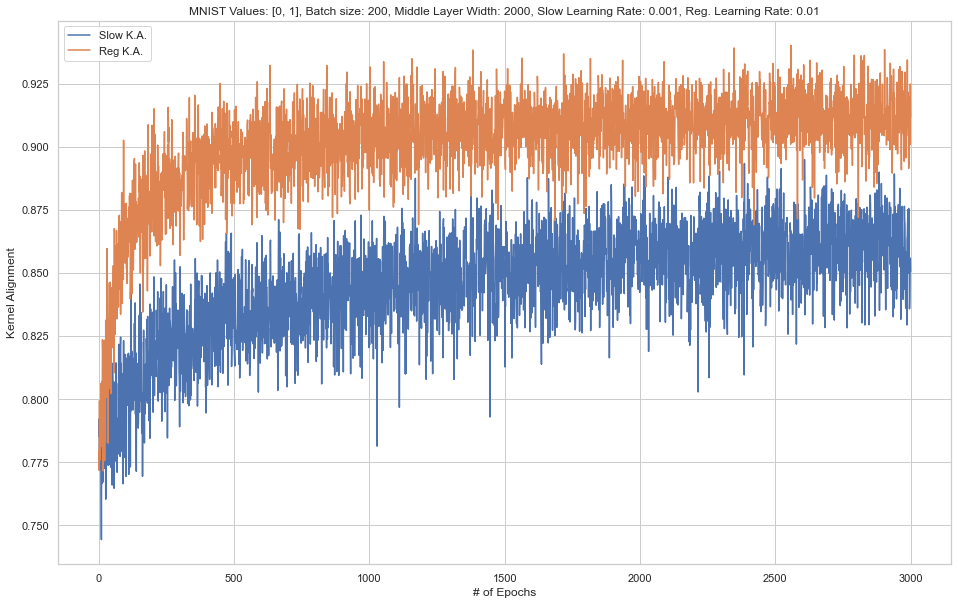

In [8]:
sns.set(rc = {'figure.figsize':(16,10)}) # setting figure size
sns.set_style('whitegrid') # setting seaborn theme 
plot = sns.lineplot(data=df[["Slow K.A.", "Reg K.A."]], dashes=False);
plot.set_title("MNIST Values: [0, 1], Batch size: 200, Middle Layer Width: 2000, Slow Learning Rate: 0.001, Reg. Learning Rate: 0.01")
plt.xlabel("# of Epochs");
plt.ylabel("Kernel Alignment");